In [ ]:
import numpy as np
import pandas as pd


In [ ]:
!pip install umap-learn scprep

In [ ]:
pspst2_toAPOP = pd.read_csv('/content/pst2_toAPOP.csv')

In [ ]:
clusters = pd.read_csv('/content/clusterer_MCF7_HDBSCAN.csv')

In [ ]:
clusters

,Unnamed: 0,0
0,0,4
1,1,7
2,2,4
3,3,4
4,4,4
...,...,...
358,358,-1
359,359,5
360,360,-1
361,361,-1


In [ ]:
pspst2_toAPOP

,Unnamed: 0,curve1,curve2,curve3,curve4
0,1,2.250748,1.658286,2.240835,2.141853
1,2,54.605694,NaN,NaN,NaN
2,3,3.566189,2.981162,3.573239,3.474903
3,4,5.963633,5.357354,5.906414,5.850942
4,5,5.723254,5.181320,5.725362,5.649232
...,...,...,...,...,...
358,359,NaN,55.141882,NaN,NaN
359,360,43.969688,NaN,46.761096,NaN
360,361,NaN,NaN,52.386724,NaN
361,362,NaN,NaN,NaN,40.516374


In [ ]:
phenix_impu=  pd.read_csv('/content/X_phenix_Imputed.csv')
phenix_impu

,Unnamed: 0,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,...,RP11-254F7.3,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P
0,D6_1,0.052523,0.017098,0.043615,0.020654,1.030425e-05,0.000053,0.103538,0.502454,0.474567,...,0.0,0.000034,3.651056e-06,3.239249e-07,0.000091,1.143015e-05,0.0,8.059662e-07,0.0,0.010823
1,D6_2,0.027384,0.007523,0.030097,0.009427,7.909640e-03,0.011676,0.083795,0.426411,0.552883,...,0.0,0.001069,4.829637e-04,2.471712e-05,0.001147,5.899957e-04,0.0,2.384558e-04,0.0,0.001168
2,D6_3,0.057400,0.014494,0.044388,0.009531,1.694272e-06,0.000015,0.098356,0.504129,0.454362,...,0.0,0.000014,1.723873e-06,1.893597e-08,0.000017,5.390703e-06,0.0,4.286652e-07,0.0,0.008680
3,D6_4,0.054447,0.015051,0.048107,0.004018,1.272801e-06,0.000014,0.118475,0.506054,0.436026,...,0.0,0.000022,1.075921e-06,1.435462e-08,0.000005,3.149943e-06,0.0,3.976802e-07,0.0,0.006867
4,D6_5,0.050394,0.024274,0.042955,0.005580,7.714233e-07,0.000006,0.139241,0.474659,0.460883,...,0.0,0.000004,9.951884e-08,2.111687e-09,0.000004,5.325036e-07,0.0,2.117942e-08,0.0,0.010574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,D19_226,0.050244,0.008892,0.052569,0.030086,6.920303e-04,0.002037,0.084013,0.493632,0.488301,...,0.0,0.001175,3.047087e-04,6.183099e-05,0.001340,4.344010e-04,0.0,1.624488e-04,0.0,0.007538
359,D19_227,0.024083,0.009036,0.043992,0.016116,7.130897e-04,0.005166,0.108184,0.427763,0.542148,...,0.0,0.004017,1.927074e-03,3.573354e-03,0.000962,1.216686e-03,0.0,2.517982e-03,0.0,0.000587
360,D19_228,0.011238,0.014383,0.042904,0.024610,5.713210e-05,0.002247,0.154149,0.395429,0.513210,...,0.0,0.001913,1.813175e-04,7.063864e-03,0.000191,8.713082e-05,0.0,5.527877e-04,0.0,0.000102
361,D19_229,0.024309,0.040204,0.030939,0.002952,5.253685e-05,0.001106,0.076849,0.447349,0.356563,...,0.0,0.003655,2.374254e-04,9.334531e-04,0.000402,2.372314e-04,0.0,2.680365e-04,0.0,0.000102


In [ ]:
phenix_impu_umap= phenix_impu.set_index('Unnamed: 0')
phenix_impu_umap

,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AADAC,...,RP11-254F7.3,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
D6_1,0.052523,0.017098,0.043615,0.020654,1.030425e-05,0.000053,0.103538,0.502454,0.474567,0.007013,...,0.0,0.000034,3.651056e-06,3.239249e-07,0.000091,1.143015e-05,0.0,8.059662e-07,0.0,0.010823
D6_2,0.027384,0.007523,0.030097,0.009427,7.909640e-03,0.011676,0.083795,0.426411,0.552883,0.000181,...,0.0,0.001069,4.829637e-04,2.471712e-05,0.001147,5.899957e-04,0.0,2.384558e-04,0.0,0.001168
D6_3,0.057400,0.014494,0.044388,0.009531,1.694272e-06,0.000015,0.098356,0.504129,0.454362,0.012016,...,0.0,0.000014,1.723873e-06,1.893597e-08,0.000017,5.390703e-06,0.0,4.286652e-07,0.0,0.008680
D6_4,0.054447,0.015051,0.048107,0.004018,1.272801e-06,0.000014,0.118475,0.506054,0.436026,0.015727,...,0.0,0.000022,1.075921e-06,1.435462e-08,0.000005,3.149943e-06,0.0,3.976802e-07,0.0,0.006867
D6_5,0.050394,0.024274,0.042955,0.005580,7.714233e-07,0.000006,0.139241,0.474659,0.460883,0.015347,...,0.0,0.000004,9.951884e-08,2.111687e-09,0.000004,5.325036e-07,0.0,2.117942e-08,0.0,0.010574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D19_226,0.050244,0.008892,0.052569,0.030086,6.920303e-04,0.002037,0.084013,0.493632,0.488301,0.001540,...,0.0,0.001175,3.047087e-04,6.183099e-05,0.001340,4.344010e-04,0.0,1.624488e-04,0.0,0.007538
D19_227,0.024083,0.009036,0.043992,0.016116,7.130897e-04,0.005166,0.108184,0.427763,0.542148,0.006494,...,0.0,0.004017,1.927074e-03,3.573354e-03,0.000962,1.216686e-03,0.0,2.517982e-03,0.0,0.000587
D19_228,0.011238,0.014383,0.042904,0.024610,5.713210e-05,0.002247,0.154149,0.395429,0.513210,0.021280,...,0.0,0.001913,1.813175e-04,7.063864e-03,0.000191,8.713082e-05,0.0,5.527877e-04,0.0,0.000102


In [ ]:

META_1['APOP_1'] = pspst2_toAPOP['curve4']

In [ ]:
psp['curve1']

In [ ]:
phenix_impu_umap = phenix_impu_umap.reset_index()

In [ ]:
phenix_impu_umap

,Unnamed: 0,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,...,RP11-254F7.3,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P
0,D6_1,0.052523,0.017098,0.043615,0.020654,1.030425e-05,0.000053,0.103538,0.502454,0.474567,...,0.0,0.000034,3.651056e-06,3.239249e-07,0.000091,1.143015e-05,0.0,8.059662e-07,0.0,0.010823
1,D6_2,0.027384,0.007523,0.030097,0.009427,7.909640e-03,0.011676,0.083795,0.426411,0.552883,...,0.0,0.001069,4.829637e-04,2.471712e-05,0.001147,5.899957e-04,0.0,2.384558e-04,0.0,0.001168
2,D6_3,0.057400,0.014494,0.044388,0.009531,1.694272e-06,0.000015,0.098356,0.504129,0.454362,...,0.0,0.000014,1.723873e-06,1.893597e-08,0.000017,5.390703e-06,0.0,4.286652e-07,0.0,0.008680
3,D6_4,0.054447,0.015051,0.048107,0.004018,1.272801e-06,0.000014,0.118475,0.506054,0.436026,...,0.0,0.000022,1.075921e-06,1.435462e-08,0.000005,3.149943e-06,0.0,3.976802e-07,0.0,0.006867
4,D6_5,0.050394,0.024274,0.042955,0.005580,7.714233e-07,0.000006,0.139241,0.474659,0.460883,...,0.0,0.000004,9.951884e-08,2.111687e-09,0.000004,5.325036e-07,0.0,2.117942e-08,0.0,0.010574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,D19_226,0.050244,0.008892,0.052569,0.030086,6.920303e-04,0.002037,0.084013,0.493632,0.488301,...,0.0,0.001175,3.047087e-04,6.183099e-05,0.001340,4.344010e-04,0.0,1.624488e-04,0.0,0.007538
359,D19_227,0.024083,0.009036,0.043992,0.016116,7.130897e-04,0.005166,0.108184,0.427763,0.542148,...,0.0,0.004017,1.927074e-03,3.573354e-03,0.000962,1.216686e-03,0.0,2.517982e-03,0.0,0.000587
360,D19_228,0.011238,0.014383,0.042904,0.024610,5.713210e-05,0.002247,0.154149,0.395429,0.513210,...,0.0,0.001913,1.813175e-04,7.063864e-03,0.000191,8.713082e-05,0.0,5.527877e-04,0.0,0.000102
361,D19_229,0.024309,0.040204,0.030939,0.002952,5.253685e-05,0.001106,0.076849,0.447349,0.356563,...,0.0,0.003655,2.374254e-04,9.334531e-04,0.000402,2.372314e-04,0.0,2.680365e-04,0.0,0.000102


In [ ]:
phenix_impu_umap['PT']=psp['curve1']

In [ ]:
phenix_impu_umap= phenix_impu_umap.dropna()

In [ ]:
phenix_impu_umap=phenix_impu_umap.set_index('Unnamed: 0')

In [ ]:
import scprep

In [ ]:
# # This is basically a parallel for-loop
# # Note we are getting both the DREMI scores and DREVI plots here so we need to unpack them
import scprep
from joblib import Parallel, delayed
results = Parallel(n_jobs=4)(delayed(scprep.stats.knnDREMI)(phenix_impu_umap['PT'], phenix_impu_umap[g], 
                                      return_drevi=True, n_jobs=1) for g in phenix_impu_umap.columns)
# 
# # Unpacking the DREMI scores and DREVI images
vim_dremi_scores = np.array([r[0] for r in results])
vim_drevi_images = np.array([r[1].flatten() for r in results])

In [ ]:
vim_dremi_scores

array([0.66185484, 0.74464066, 0.66113628, ..., 0.        , 0.60382271,
       1.23254252])

0.4158568579586648

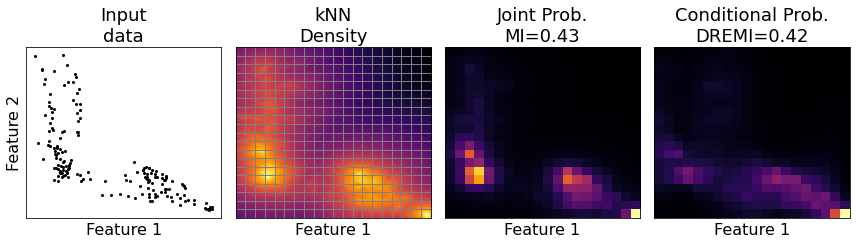

In [ ]:
scprep.stats.knnDREMI(phenix_impu_umap['VIM'], phenix_impu_umap['FN1'], n_jobs=1,plot=True,n_bins=20)

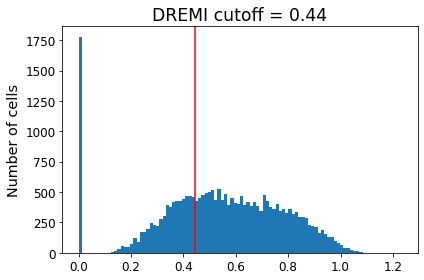

In [ ]:
emt_cutoff = np.percentile(vim_dremi_scores, q=33)
scprep.plot.histogram(vim_dremi_scores, percentile=33, title='DREMI cutoff = {:.2f}'.format(emt_cutoff))

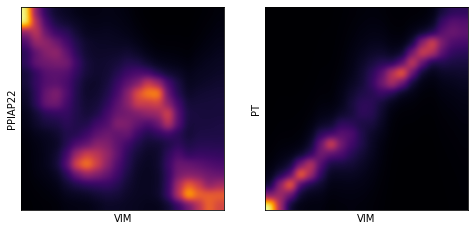

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(8,4))

dremi_indices = [10000,-1]
# Note: we're using -2 (the second largest value)
# because the gene with the highest DREMI with VIM is VIM itself
ordered_gene_indices = np.argsort(vim_dremi_scores)

for i, ax in enumerate(axes):
    curr_index = dremi_indices[i]
    ax.imshow(vim_drevi_images[ordered_gene_indices[curr_index]].reshape(20,20), origin='lower',cmap='inferno',interpolation='gaussian')
    ax.set_xticks([]); ax.set_yticks([]);
    ax.set_xlabel('VIM')
    ax.set_ylabel(phenix_impu_umap.columns.values[curr_index])

In [ ]:
emt_related_genes_mask = vim_dremi_scores > emt_cutoff

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_op = AgglomerativeClustering(n_clusters=22, affinity='correlation', linkage='complete')
clusters = agg_op.fit_predict(vim_drevi_images[emt_related_genes_mask])

In [ ]:
clusters

array([16,  3,  2, ..., 19, 11,  1])

In [ ]:
from scipy.stats import gmean
mean_drevi = {}
for cl in np.unique(clusters):
    # Select images for the current cluster
    curr_images = vim_drevi_images[emt_related_genes_mask][clusters == cl]
    
    # Calculate the geometric mean
    mean_drevi[cl] = gmean(curr_images, axis=0)

In [ ]:
emt_related_genes_mask[clusters == 1]

IndexError: ignored

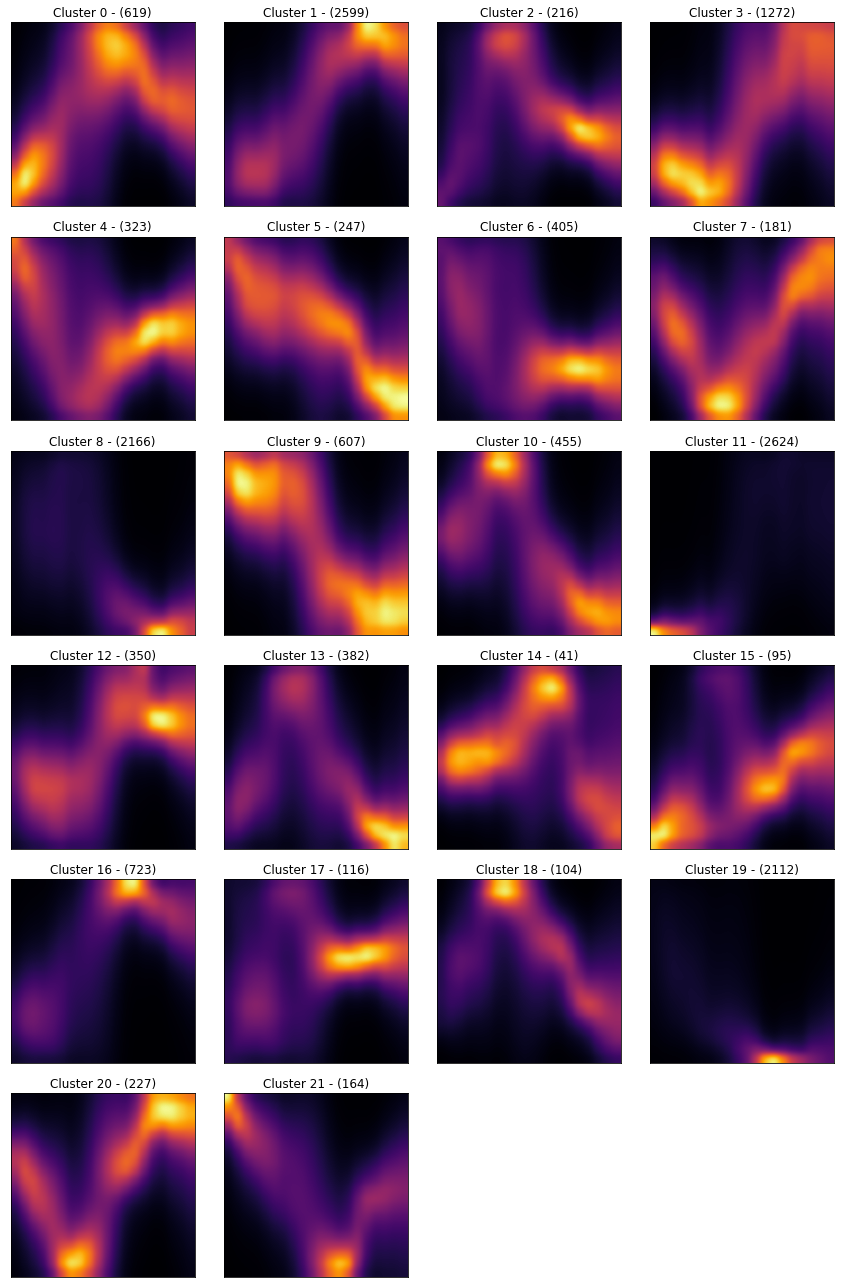

In [ ]:
fig, axes = plt.subplots(6,4, figsize=(4*3,6*3))

for curr_cluster, ax in enumerate(axes.flatten()):
    if curr_cluster >= 22:
        ax.axis('off')
        continue
    curr_drevi = mean_drevi[curr_cluster].reshape(20,20)
    
    curr_n = np.sum(clusters == curr_cluster)
    ax.imshow(curr_drevi, origin='lower', cmap='inferno',interpolation='gaussian')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title('Cluster {} - ({})'.format(curr_cluster, curr_n))
    
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))

# Pick your favorite cluster
curr_cluster = 4
curr_drevi = mean_drevi[curr_cluster].reshape(20,20)

# Plot DREVI
curr_n = np.sum(clusters == curr_cluster)
ax.imshow(curr_drevi, origin='lower', cmap='inferno')
ax.set_xticks([]); ax.set_yticks([])
ax.set_title('Cluster {} - ({})'.format(curr_cluster, curr_n))

# Plot the "average expression" and ID the peak
x = np.arange(20)
y = np.argmax(curr_drevi, axis=0)
x_peak = np.argmax(y)
y_peak = np.max(y)
ax.plot(x,y, c='r', linewidth=5)
ax.scatter(x_peak, y_peak, edgecolor='k', color='lightgrey', s=100, zorder=10)
ax.set_xlim(0,19)

fig.tight_layout()

In [ ]:
peaks = {}

for curr_cluster in np.unique(clusters):

    curr_drevi = mean_drevi[curr_cluster].reshape(20,20)
       
    x = np.arange(20)
    y = np.argmax(curr_drevi, axis=0)
    x_peak = np.argmax(y)
    y_peak = np.max(y)

    peaks[curr_cluster] = x_peak

In [ ]:
clusters = scprep.utils.sort_clusters_by_values(clusters, np.array([peaks[cl] for cl in clusters]))

In [ ]:
mean_drevi = {}
for cl in np.unique(clusters):
    curr_images = vim_drevi_images[emt_related_genes_mask][clusters == cl]
    mean_drevi[cl] = gmean(curr_images, axis=0)

In [ ]:
peaks = {}

for curr_cluster in np.unique(clusters):

    curr_drevi = mean_drevi[curr_cluster].reshape(20,20)
       
    x = np.arange(20)
    y = np.argmax(curr_drevi, axis=0)
    x_peak = np.argmax(y)
    y_peak = np.max(y)

    peaks[curr_cluster] = x_peak

In [ ]:
fig, axes = plt.subplots(6,4, figsize=(4*2,6*2))

for curr_cluster, ax in enumerate(axes.flatten()):
    if curr_cluster >= 22:
        ax.axis('off')
        continue
    curr_drevi = mean_drevi[curr_cluster].reshape(20,20)
    
    curr_n = np.sum(clusters == curr_cluster)
    ax.imshow(curr_drevi, origin='lower', cmap='inferno')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title('Cluster {} - ({})'.format(curr_cluster, curr_n))
    
    x = np.arange(20)
    y = np.argmax(curr_drevi, axis=0)
    x_peak = np.argmax(y)
    y_peak = np.max(y)
    ax.plot(x,y, c='r', linewidth=5)
    ax.scatter(x_peak, y_peak, edgecolor='k', color='lightgrey', s=100, zorder=10)
    ax.set_xlim(0,19)
fig.tight_layout()

In [ ]:
from sklearn.decomposition import PCA
import umap
pca = PCA(n_components=50, random_state=1)
pca_data= pca.fit_transform(phenix_impu_umap)



In [ ]:
fit = umap.UMAP(n_components=3,verbose=True,n_neighbors=300,min_dist=0.9,metric='cosine')
dim_reduction = fit.fit_transform(phenix_impu_umap)

In [ ]:
umap_1 = pd.DataFrame(dim_reduction,columns=['UMAP1','UMAP2','UMAP3'])

In [ ]:
pca = PCA(n_components=30, random_state=1)
pca_data= pca.fit_transform(phenix_impu_umap)
fit = umap.UMAP(n_components=2,verbose=True,n_neighbors=360,min_dist=0.9,metric='cosine',n_epochs=10000,local_connectivity=50)
dim_reduction_1 = fit.fit_transform(pca_data)
umap_2 = pd.DataFrame(dim_reduction_1,columns=['UMAP1','UMAP2'])

In [ ]:
umap_2

In [ ]:
clusters

In [ ]:
# x and y given as array_like objects
import plotly.express as px
fig = px.scatter(umap_2, x='UMAP1', y='UMAP2', color=clusters['0'].astype('category'), color_discrete_sequence= px.colors.qualitative.Light24)
fig.update_layout(title_text=".              HDBSCAMcluster",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='#E5E5E5')))
fig.show()

NameError: ignored

In [ ]:
import plotly.express as px

fig = px.scatter_3d(umap_1, x='UMAP1', y='UMAP2', z='UMAP3',
              color=clusters['0'].astype('category'), color_discrete_sequence=
              px.colors.qualitative.Light24)
fig.update_layout(title_text=".              HDBSCAMcluster",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='#E5E5E5')))
fig.update_layout(scene_aspectmode='cube')
fig.update_traces(marker=dict(size=3))

NameError: ignored

In [ ]:
META = phenix_impu[['CDH1','VIM','MT-ND1','BCL2','TUBB',
                    'TUBA1B','CASP9','MT-CO1','MT-CO2','BRCA1',
                    'RPL37','RPL10','ALDOA','RRM2','ACTG1',
                    'NEAT1','MT-RNR2','MT-RNR1','MALAT1','ZEB1']]

In [ ]:
META_1 = META

In [ ]:
phenix_impu.ZEB1

0      0.001825
1      0.006725
2      0.000721
3      0.000267
4      0.000181
         ...   
358    0.009413
359    0.010922
360    0.004250
361    0.003257
362    0.001082
Name: ZEB1, Length: 363, dtype: float64

In [ ]:
META

,CDH1,VIM,MT-ND1,BCL2,TUBB,TUBA1B,CASP9,MT-CO1,MT-CO2,BRCA1,RPL37,RPL10,ALDOA,RRM2,ACTG1,NEAT1,MT-RNR2,MT-RNR1,MALAT1,ZEB1
0,2.448791,0.131888,2.132507,0.299213,2.224720,5.101895,0.078205,2.355749,2.505981,0.358438,4.614077,4.076989,3.749325,2.104676,6.265001,3.298672,2.907389,0.857377,2.392267,0.001825
1,3.029226,0.074673,2.120589,0.423459,1.133339,2.288142,0.117091,2.251023,2.408689,0.031412,5.352532,4.652496,3.782036,0.201631,4.967442,4.769146,3.032159,0.723993,3.397092,0.006725
2,2.524977,0.119371,2.300726,0.288936,2.373673,5.339777,0.080565,2.542663,2.739355,0.399877,4.706914,4.065720,3.671860,2.317661,6.179741,3.156066,3.209737,0.912662,2.382065,0.000721
3,2.612396,0.112308,2.992652,0.293740,2.401945,5.339844,0.094337,3.322524,3.596615,0.409236,4.734162,4.030902,3.624522,2.312617,6.292924,3.096248,4.247692,1.195407,2.407642,0.000267
4,2.654758,0.142711,2.921607,0.339433,2.389563,5.422211,0.103784,3.292447,3.523349,0.368698,4.669282,3.932498,3.573177,2.265536,6.795188,3.048513,4.075974,1.191283,2.361729,0.000181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2.599830,0.080146,2.483844,0.318585,1.591259,3.601997,0.089523,2.608218,2.826789,0.197170,4.747773,4.377577,3.807922,1.109560,5.557280,4.103066,3.452057,0.917619,2.959294,0.009413
359,2.491269,0.053690,2.133835,0.194344,0.959524,2.079505,0.122069,2.126723,2.315598,0.033873,4.852999,4.503128,3.849061,0.141632,4.238520,5.282360,3.162098,0.742014,3.538826,0.010922
360,2.411867,0.045249,2.624023,0.168596,0.830127,1.780403,0.135791,2.668040,2.931671,0.036803,4.490052,4.167987,3.879647,0.102781,4.082290,6.376887,4.012576,0.972977,4.142966,0.004250
361,2.626179,0.023699,7.137222,0.226411,0.695959,1.953760,0.112440,7.551228,8.557111,0.182962,4.020304,3.617482,3.132011,0.320985,4.135535,8.201063,11.462271,3.195771,5.879316,0.003257


In [ ]:
 pspst2_toAPOP['curve4']

0       2.141853
1            NaN
2       3.474903
3       5.850942
4       5.649232
         ...    
358          NaN
359          NaN
360          NaN
361    40.516374
362    46.599277
Name: curve4, Length: 363, dtype: float64

In [ ]:
META_1['APOP_1'] = pspst2_toAPOP['curve4']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
clusters['0']

0      4
1      7
2      4
3      4
4      4
      ..
358   -1
359    5
360   -1
361   -1
362    2
Name: 0, Length: 363, dtype: int64

In [ ]:
META_1['clusters']=clusters['0']
META_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CDH1,VIM,MT-ND1,BCL2,TUBB,TUBA1B,CASP9,MT-CO1,MT-CO2,BRCA1,...,ALDOA,RRM2,ACTG1,NEAT1,MT-RNR2,MT-RNR1,MALAT1,ZEB1,APOP_1,clusters
0,2.448791,0.131888,2.132507,0.299213,2.224720,5.101895,0.078205,2.355749,2.505981,0.358438,...,3.749325,2.104676,6.265001,3.298672,2.907389,0.857377,2.392267,0.001825,2.141853,4
1,3.029226,0.074673,2.120589,0.423459,1.133339,2.288142,0.117091,2.251023,2.408689,0.031412,...,3.782036,0.201631,4.967442,4.769146,3.032159,0.723993,3.397092,0.006725,NaN,7
2,2.524977,0.119371,2.300726,0.288936,2.373673,5.339777,0.080565,2.542663,2.739355,0.399877,...,3.671860,2.317661,6.179741,3.156066,3.209737,0.912662,2.382065,0.000721,3.474903,4
3,2.612396,0.112308,2.992652,0.293740,2.401945,5.339844,0.094337,3.322524,3.596615,0.409236,...,3.624522,2.312617,6.292924,3.096248,4.247692,1.195407,2.407642,0.000267,5.850942,4
4,2.654758,0.142711,2.921607,0.339433,2.389563,5.422211,0.103784,3.292447,3.523349,0.368698,...,3.573177,2.265536,6.795188,3.048513,4.075974,1.191283,2.361729,0.000181,5.649232,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2.599830,0.080146,2.483844,0.318585,1.591259,3.601997,0.089523,2.608218,2.826789,0.197170,...,3.807922,1.109560,5.557280,4.103066,3.452057,0.917619,2.959294,0.009413,NaN,-1
359,2.491269,0.053690,2.133835,0.194344,0.959524,2.079505,0.122069,2.126723,2.315598,0.033873,...,3.849061,0.141632,4.238520,5.282360,3.162098,0.742014,3.538826,0.010922,NaN,5
360,2.411867,0.045249,2.624023,0.168596,0.830127,1.780403,0.135791,2.668040,2.931671,0.036803,...,3.879647,0.102781,4.082290,6.376887,4.012576,0.972977,4.142966,0.004250,NaN,-1
361,2.626179,0.023699,7.137222,0.226411,0.695959,1.953760,0.112440,7.551228,8.557111,0.182962,...,3.132011,0.320985,4.135535,8.201063,11.462271,3.195771,5.879316,0.003257,40.516374,-1


In [ ]:
META_1 

,CDH1,VIM,MT-ND1,BCL2,TUBB,TUBA1B,CASP9,MT-CO1,MT-CO2,BRCA1,...,ALDOA,RRM2,ACTG1,NEAT1,MT-RNR2,MT-RNR1,MALAT1,ZEB1,APOP_1,clusters
0,2.448791,0.131888,2.132507,0.299213,2.224720,5.101895,0.078205,2.355749,2.505981,0.358438,...,3.749325,2.104676,6.265001,3.298672,2.907389,0.857377,2.392267,0.001825,2.141853,4
1,3.029226,0.074673,2.120589,0.423459,1.133339,2.288142,0.117091,2.251023,2.408689,0.031412,...,3.782036,0.201631,4.967442,4.769146,3.032159,0.723993,3.397092,0.006725,NaN,7
2,2.524977,0.119371,2.300726,0.288936,2.373673,5.339777,0.080565,2.542663,2.739355,0.399877,...,3.671860,2.317661,6.179741,3.156066,3.209737,0.912662,2.382065,0.000721,3.474903,4
3,2.612396,0.112308,2.992652,0.293740,2.401945,5.339844,0.094337,3.322524,3.596615,0.409236,...,3.624522,2.312617,6.292924,3.096248,4.247692,1.195407,2.407642,0.000267,5.850942,4
4,2.654758,0.142711,2.921607,0.339433,2.389563,5.422211,0.103784,3.292447,3.523349,0.368698,...,3.573177,2.265536,6.795188,3.048513,4.075974,1.191283,2.361729,0.000181,5.649232,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2.599830,0.080146,2.483844,0.318585,1.591259,3.601997,0.089523,2.608218,2.826789,0.197170,...,3.807922,1.109560,5.557280,4.103066,3.452057,0.917619,2.959294,0.009413,NaN,-1
359,2.491269,0.053690,2.133835,0.194344,0.959524,2.079505,0.122069,2.126723,2.315598,0.033873,...,3.849061,0.141632,4.238520,5.282360,3.162098,0.742014,3.538826,0.010922,NaN,5
360,2.411867,0.045249,2.624023,0.168596,0.830127,1.780403,0.135791,2.668040,2.931671,0.036803,...,3.879647,0.102781,4.082290,6.376887,4.012576,0.972977,4.142966,0.004250,NaN,-1
361,2.626179,0.023699,7.137222,0.226411,0.695959,1.953760,0.112440,7.551228,8.557111,0.182962,...,3.132011,0.320985,4.135535,8.201063,11.462271,3.195771,5.879316,0.003257,40.516374,-1


In [ ]:
META_1=META_1.dropna(axis=0)
META_1

,CDH1,VIM,MT-ND1,BCL2,TUBB,TUBA1B,CASP9,MT-CO1,MT-CO2,BRCA1,...,ALDOA,RRM2,ACTG1,NEAT1,MT-RNR2,MT-RNR1,MALAT1,ZEB1,APOP_1,clusters
0,2.448791,0.131888,2.132507,0.299213,2.224720,5.101895,0.078205,2.355749,2.505981,0.358438,...,3.749325,2.104676,6.265001,3.298672,2.907389,0.857377,2.392267,0.001825,2.141853,4
2,2.524977,0.119371,2.300726,0.288936,2.373673,5.339777,0.080565,2.542663,2.739355,0.399877,...,3.671860,2.317661,6.179741,3.156066,3.209737,0.912662,2.382065,0.000721,3.474903,4
3,2.612396,0.112308,2.992652,0.293740,2.401945,5.339844,0.094337,3.322524,3.596615,0.409236,...,3.624522,2.312617,6.292924,3.096248,4.247692,1.195407,2.407642,0.000267,5.850942,4
4,2.654758,0.142711,2.921607,0.339433,2.389563,5.422211,0.103784,3.292447,3.523349,0.368698,...,3.573177,2.265536,6.795188,3.048513,4.075974,1.191283,2.361729,0.000181,5.649232,4
5,2.542023,0.112435,2.358339,0.280973,2.413711,5.389997,0.080060,2.598860,2.813274,0.414676,...,3.657672,2.376484,6.105559,3.122670,3.312582,0.928777,2.385522,0.000488,3.790361,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,2.635308,0.024316,7.340079,0.233563,0.716324,1.979527,0.113804,7.780500,8.806395,0.186852,...,3.152915,0.340849,4.176576,8.247743,11.796096,3.293996,5.888560,0.002250,41.509450,1
355,2.671673,0.019303,8.225865,0.239592,0.652671,1.947292,0.103780,8.745566,9.936702,0.223396,...,2.953994,0.369296,4.103913,8.728027,13.281266,3.727167,6.356242,0.001382,45.853584,2
357,2.698141,0.021865,8.206592,0.249413,0.702754,2.039067,0.107592,8.767946,9.940489,0.227757,...,2.977598,0.407180,4.191656,8.433547,13.214250,3.702313,6.148766,0.001239,45.666513,2
361,2.626179,0.023699,7.137222,0.226411,0.695959,1.953760,0.112440,7.551228,8.557111,0.182962,...,3.132011,0.320985,4.135535,8.201063,11.462271,3.195771,5.879316,0.003257,40.516374,-1


In [ ]:
cluster_labels= META_1['clusters']
cluster_labels

0      4
2      4
3      4
4      4
5      4
      ..
351    1
355    2
357    2
361   -1
362    2
Name: clusters, Length: 133, dtype: int64

In [ ]:
META_1['clusters'].unique()

array([ 4, -1,  0,  1,  2])

In [ ]:
#z_score=1
"""
import seaborn as sns
# Etiquetas para heatmaps
lol= ['blue', 'red', 'green','purple','orange']
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imputed_ALL.iloc[:,:],row_colors=row_colors.to_numpy(),
                    yticklabels=False,xticklabels=True,col_cluster=True,row_cluster=True,cmap="viridis",figsize=(15, 10),dendrogram_ratio=0.1,z_score=1)
"""

'\nimport seaborn as sns\n# Etiquetas para heatmaps\nlol= [\'blue\', \'red\', \'green\',\'purple\',\'orange\']\nlut = dict(zip(labels_umap_.unique(), lol))\nrow_colors = labels_umap_.map(lut)\n\nax = sns.clustermap(imputed_ALL.iloc[:,:],row_colors=row_colors.to_numpy(),\n                    yticklabels=False,xticklabels=True,col_cluster=True,row_cluster=True,cmap="viridis",figsize=(15, 10),dendrogram_ratio=0.1,z_score=1)\n'

In [ ]:
META_1

,CDH1,VIM,MT-ND1,BCL2,TUBB,TUBA1B,CASP9,MT-CO1,MT-CO2,BRCA1,...,ALDOA,RRM2,ACTG1,NEAT1,MT-RNR2,MT-RNR1,MALAT1,ZEB1,APOP_1,clusters
0,2.448791,0.131888,2.132507,0.299213,2.224720,5.101895,0.078205,2.355749,2.505981,0.358438,...,3.749325,2.104676,6.265001,3.298672,2.907389,0.857377,2.392267,0.001825,2.141853,4
2,2.524977,0.119371,2.300726,0.288936,2.373673,5.339777,0.080565,2.542663,2.739355,0.399877,...,3.671860,2.317661,6.179741,3.156066,3.209737,0.912662,2.382065,0.000721,3.474903,4
3,2.612396,0.112308,2.992652,0.293740,2.401945,5.339844,0.094337,3.322524,3.596615,0.409236,...,3.624522,2.312617,6.292924,3.096248,4.247692,1.195407,2.407642,0.000267,5.850942,4
4,2.654758,0.142711,2.921607,0.339433,2.389563,5.422211,0.103784,3.292447,3.523349,0.368698,...,3.573177,2.265536,6.795188,3.048513,4.075974,1.191283,2.361729,0.000181,5.649232,4
5,2.542023,0.112435,2.358339,0.280973,2.413711,5.389997,0.080060,2.598860,2.813274,0.414676,...,3.657672,2.376484,6.105559,3.122670,3.312582,0.928777,2.385522,0.000488,3.790361,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,2.635308,0.024316,7.340079,0.233563,0.716324,1.979527,0.113804,7.780500,8.806395,0.186852,...,3.152915,0.340849,4.176576,8.247743,11.796096,3.293996,5.888560,0.002250,41.509450,1
355,2.671673,0.019303,8.225865,0.239592,0.652671,1.947292,0.103780,8.745566,9.936702,0.223396,...,2.953994,0.369296,4.103913,8.728027,13.281266,3.727167,6.356242,0.001382,45.853584,2
357,2.698141,0.021865,8.206592,0.249413,0.702754,2.039067,0.107592,8.767946,9.940489,0.227757,...,2.977598,0.407180,4.191656,8.433547,13.214250,3.702313,6.148766,0.001239,45.666513,2
361,2.626179,0.023699,7.137222,0.226411,0.695959,1.953760,0.112440,7.551228,8.557111,0.182962,...,3.132011,0.320985,4.135535,8.201063,11.462271,3.195771,5.879316,0.003257,40.516374,-1


In [ ]:
META_1_SORT= META_1.sort_values('APOP_1')
META_1_SORT

,CDH1,VIM,MT-ND1,BCL2,TUBB,TUBA1B,CASP9,MT-CO1,MT-CO2,BRCA1,...,ALDOA,RRM2,ACTG1,NEAT1,MT-RNR2,MT-RNR1,MALAT1,ZEB1,APOP_1,clusters
350,2.459222,0.100040,1.949917,0.303997,1.879535,4.288386,0.070314,2.032712,2.183472,0.271724,...,3.863878,1.574545,5.856424,3.693228,2.579545,0.716300,2.643135,0.006660,0.000000,4
302,2.451239,0.099821,1.958173,0.296913,1.889285,4.310042,0.070940,2.050237,2.201431,0.278528,...,3.859104,1.596610,5.791147,3.697409,2.619991,0.725295,2.641818,0.006856,0.000000,4
209,2.408297,0.106430,1.876909,0.282982,2.015595,4.601491,0.067846,1.992975,2.133022,0.320155,...,3.847973,1.810153,5.791451,3.570213,2.534917,0.711655,2.544272,0.005396,0.183282,4
59,2.477169,0.102421,2.011570,0.306863,1.919748,4.371523,0.072674,2.117830,2.274011,0.280087,...,3.840214,1.629269,5.904414,3.648729,2.682936,0.748073,2.624084,0.005988,0.374251,4
255,2.419786,0.112534,1.939716,0.293844,2.034632,4.655100,0.069419,2.068387,2.210915,0.316629,...,3.839394,1.825852,5.966635,3.529978,2.595525,0.742913,2.519998,0.004553,0.483347,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2.714409,0.022343,8.336272,0.254350,0.718134,2.083828,0.106797,8.926453,10.119309,0.237815,...,2.950749,0.436041,4.219799,8.384658,13.418021,3.760024,6.142610,0.001032,46.287331,2
128,2.693061,0.019931,8.380928,0.246347,0.669819,1.992177,0.103762,8.937532,10.149374,0.232674,...,2.933247,0.395570,4.138044,8.653900,13.524561,3.795235,6.327349,0.001124,46.576196,2
362,2.695947,0.020154,8.388129,0.247483,0.674661,2.001012,0.104197,8.949756,10.160857,0.233153,...,2.935834,0.399369,4.147272,8.628104,13.532984,3.797250,6.308250,0.001082,46.599277,2
123,2.699870,0.020511,8.389590,0.248783,0.681521,2.015335,0.104349,8.957022,10.167414,0.234721,...,2.934968,0.406450,4.158330,8.591177,13.531131,3.795999,6.286638,0.001069,46.602013,2


In [ ]:
#META_SORT=META_SORT.drop(columns=['clusters'])

#META_SORT

In [ ]:
META_1_SORT['clusters'].unique()

array([ 4, -1,  0,  1,  2])

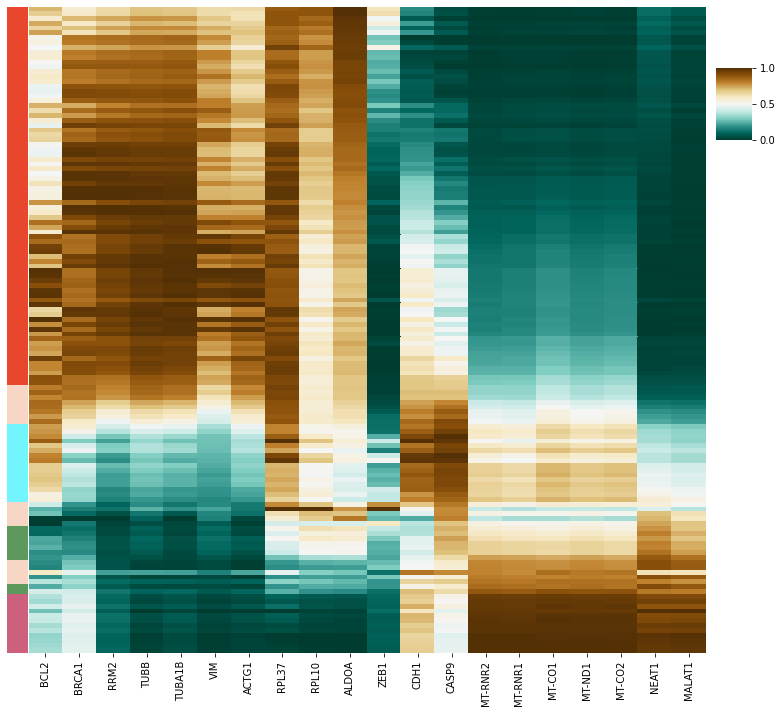

In [ ]:
import seaborn as sns
lol= ['#E9472D', '#F7D6C6', '#72F5FD','#5D995D','#CD617D']
lut = dict(zip(META_1_SORT['clusters'].unique(), lol))
row_colors = META_1_SORT['clusters'].map(lut)

sns.clustermap(META_1_SORT.drop(columns=['clusters','APOP_1']),standard_scale=1,
               col_cluster=True,row_cluster=False, cmap="BrBG_r",
               figsize=(10, 10),row_colors=row_colors.to_numpy(),
               yticklabels=False,dendrogram_ratio=0.000000001,cbar_pos=(1, 0.8, 0.05, 0.1))

In [ ]:
scores_df = pd.read_csv('/content/3DPCA.csv')

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(scores_df, x='PC1', y='PC2', z='PC3',
              color=clusters['0'].astype('category'), color_discrete_sequence=
              px.colors.qualitative.Light24)
fig.update_layout(title_text=".              HDBSCAMcluster",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='#E5E5E5')))
fig.update_layout(scene_aspectmode='cube')
fig.update_traces(marker=dict(size=3))

In [ ]:
px.colors.qualitative.Light24[0]

'#FD3216'

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(scores_df, x='PC1', y='PC2', z='PC3',
              color=pspst2_toAPOP['curve3'])
fig.update_layout(title_text=".              kmeanscluster",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='#E5E5E5')))
fig.update_layout(scene_aspectmode='cube')
fig.update_traces(marker=dict(size=3))

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(scores_df, x='PC1', y='PC2', z='PC3',
              color=phenix_impu['STAT1'])
fig.update_layout(title_text=".              kmeanscluster",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='#E5E5E5')))
fig.update_layout(scene_aspectmode='cube')
fig.update_traces(marker=dict(size=3))

BRANCH 7 TO 5

In [ ]:
psp = pd.read_csv('/content/pst.csv')

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(scores_df, x='PC1', y='PC2', z='PC3',
              color=psp['curve1'])
fig.update_layout(title_text=".              kmeanscluster",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='#E5E5E5')))
fig.update_layout(scene_aspectmode='cube')
fig.update_traces(marker=dict(size=3))

In [ ]:
META_2= META

In [ ]:
META_2['INMU'] = psp['curve4']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
META_2['clusters']=clusters['0']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
META_2

,CDH1,VIM,MT-ND1,BCL2,TUBB,TUBA1B,CASP9,MT-CO1,MT-CO2,BRCA1,...,RRM2,ACTG1,NEAT1,MT-RNR2,MT-RNR1,MALAT1,ZEB1,APOP_1,clusters,INMU
0,2.448791,0.131888,2.132507,0.299213,2.224720,5.101895,0.078205,2.355749,2.505981,0.358438,...,2.104676,6.265001,3.298672,2.907389,0.857377,2.392267,0.001825,2.141853,4,NaN
1,3.029226,0.074673,2.120589,0.423459,1.133339,2.288142,0.117091,2.251023,2.408689,0.031412,...,0.201631,4.967442,4.769146,3.032159,0.723993,3.397092,0.006725,NaN,7,1.591402
2,2.524977,0.119371,2.300726,0.288936,2.373673,5.339777,0.080565,2.542663,2.739355,0.399877,...,2.317661,6.179741,3.156066,3.209737,0.912662,2.382065,0.000721,3.474903,4,NaN
3,2.612396,0.112308,2.992652,0.293740,2.401945,5.339844,0.094337,3.322524,3.596615,0.409236,...,2.312617,6.292924,3.096248,4.247692,1.195407,2.407642,0.000267,5.850942,4,NaN
4,2.654758,0.142711,2.921607,0.339433,2.389563,5.422211,0.103784,3.292447,3.523349,0.368698,...,2.265536,6.795188,3.048513,4.075974,1.191283,2.361729,0.000181,5.649232,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2.599830,0.080146,2.483844,0.318585,1.591259,3.601997,0.089523,2.608218,2.826789,0.197170,...,1.109560,5.557280,4.103066,3.452057,0.917619,2.959294,0.009413,NaN,-1,NaN
359,2.491269,0.053690,2.133835,0.194344,0.959524,2.079505,0.122069,2.126723,2.315598,0.033873,...,0.141632,4.238520,5.282360,3.162098,0.742014,3.538826,0.010922,NaN,5,14.709940
360,2.411867,0.045249,2.624023,0.168596,0.830127,1.780403,0.135791,2.668040,2.931671,0.036803,...,0.102781,4.082290,6.376887,4.012576,0.972977,4.142966,0.004250,NaN,-1,20.785853
361,2.626179,0.023699,7.137222,0.226411,0.695959,1.953760,0.112440,7.551228,8.557111,0.182962,...,0.320985,4.135535,8.201063,11.462271,3.195771,5.879316,0.003257,40.516374,-1,NaN


In [ ]:
META_2_SORT= META_2.sort_values('INMU')
META_2_SORT

,CDH1,VIM,MT-ND1,BCL2,TUBB,TUBA1B,CASP9,MT-CO1,MT-CO2,BRCA1,...,RRM2,ACTG1,NEAT1,MT-RNR2,MT-RNR1,MALAT1,ZEB1,APOP_1,clusters,INMU
112,3.068445,0.068440,2.175202,0.419127,1.122443,2.300167,0.121076,2.390035,2.524481,0.034308,...,0.211951,4.946609,4.615086,3.115111,0.764419,3.371116,0.010228,NaN,7,2.763907e-07
120,3.067166,0.068493,2.162781,0.418407,1.120737,2.297404,0.120841,2.375485,2.508173,0.033746,...,0.209907,4.938786,4.613067,3.098001,0.759107,3.371605,0.010503,NaN,7,2.036298e-02
10,3.074968,0.069490,2.207591,0.426311,1.133972,2.309701,0.121149,2.417874,2.563173,0.036139,...,0.218833,4.991309,4.653985,3.155453,0.776170,3.373724,0.007999,NaN,7,4.715915e-02
82,3.059992,0.067427,2.285324,0.415082,1.126495,2.321418,0.122664,2.516474,2.663677,0.038877,...,0.227759,4.962848,4.613023,3.281351,0.812192,3.368518,0.010011,NaN,7,7.472659e-02
64,3.069653,0.069095,2.233815,0.424033,1.134410,2.317131,0.121417,2.447115,2.595079,0.037396,...,0.224040,4.992989,4.647359,3.194678,0.787096,3.371824,0.008253,NaN,7,1.153442e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2.671673,0.019303,8.225865,0.239592,0.652671,1.947292,0.103780,8.745566,9.936702,0.223396,...,0.369296,4.103913,8.728027,13.281266,3.727167,6.356242,0.001382,45.853584,2,NaN
357,2.698141,0.021865,8.206592,0.249413,0.702754,2.039067,0.107592,8.767946,9.940489,0.227757,...,0.407180,4.191656,8.433547,13.214250,3.702313,6.148766,0.001239,45.666513,2,NaN
358,2.599830,0.080146,2.483844,0.318585,1.591259,3.601997,0.089523,2.608218,2.826789,0.197170,...,1.109560,5.557280,4.103066,3.452057,0.917619,2.959294,0.009413,NaN,-1,NaN
361,2.626179,0.023699,7.137222,0.226411,0.695959,1.953760,0.112440,7.551228,8.557111,0.182962,...,0.320985,4.135535,8.201063,11.462271,3.195771,5.879316,0.003257,40.516374,-1,NaN


In [ ]:
META_2INMU=META_2_SORT.dropna(axis=0)
META_2INMU

,CDH1,VIM,MT-ND1,BCL2,TUBB,TUBA1B,CASP9,MT-CO1,MT-CO2,BRCA1,...,RRM2,ACTG1,NEAT1,MT-RNR2,MT-RNR1,MALAT1,ZEB1,APOP_1,clusters,INMU


In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(scores_df, x='PC1', y='PC2', z='PC3',
              color=clusters['0'].astype('category'), color_discrete_sequence=
              px.colors.qualitative.Light24)
fig.update_layout(title_text=".              HDBSCAMcluster",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='#E5E5E5')))
fig.update_layout(scene_aspectmode='cube')
fig.update_traces(marker=dict(size=3))

In [ ]:
META_2INMU['clusters'].unique()

array([], dtype=int64)

In [ ]:
import seaborn as sns
#lol= ['7.     ', ' -1.   ', '    8. ','   6.  ','  10.  ',  '  9  ',  '  5  ']
lol= ['#74fa5b', '#FFD4C5', '#E933C9','#F7F95A','#6C76F4','#F19B3D','#C539F6']
lut = dict(zip(META_2INMU['clusters'].unique(), lol))
row_colors = META_2INMU['clusters'].map(lut)

sns.clustermap(META_2INMU.drop(columns=['clusters','INMU']),standard_scale=1,
               col_cluster=True,row_cluster=False, cmap="BrBG_r",
               figsize=(5, 10),row_colors=row_colors.to_numpy(),
               yticklabels=False,dendrogram_ratio=0.000000001,cbar_pos=(1, 0.8, 0.05, 0.1))

IndexError: ignored

<Figure size 360x720 with 0 Axes>

In [ ]:
META_2INMU.ewm(span = 3600).mean()

In [ ]:
META_SORT[['APOP_1','clusters']]

In [ ]:
pspst2_toAPOP = pd.read_csv('/content/pst2_toAPOP.csv')

In [ ]:
sns.clustermap(META_SORT[['APOP_1','clusters']],standard_scale=1,col_cluster=True,row_cluster=False, cmap="BrBG_r",figsize=(5, 10),row_colors=row_colors.to_numpy(),yticklabels=False)

In [ ]:
import seaborn as sns
sns.clustermap(META.sort_values('APOP_1'),standard_scale=1,col_cluster=True,row_cluster=False, cmap="RdYlBu_r",figsize=(5, 10))

In [ ]:
import seaborn as sns
sns.clustermap(META.sort_values('APOP_1'),row_colors=row_colors.to_numpy(),standard_scale=1,yticklabels=False,xticklabels=True,col_cluster=True,row_cluster=True)

In [ ]:
yticklabels=False,xticklabels=True,col_cluster=True,row_cluster=True

In [ ]:
'vdlag' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'mag...
